In [72]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

import numpy as np 
import matplotlib 

np.random.seed(42)

# QUESTION: Who are Emaze's power users? Most presentations/ Most slides/ Most shares / Most views

#### This dataset represents the top 10,000 presentations with the most views

In [73]:
df = pd.read_csv('data/Presentations_views.csv')

In [74]:
df.head()

,presentationID,name,description,dateCreated,dateUpdated,themeID,userID,views,privacy,collaborationFlag,...,linkedinShares,twitterShares,pinterestShares,UserId,IpAddress,CountryCode,RegisterDate,LastLoginDate,PremiumStartDate,PremiumEndDate
0,8154162,home 2020,CREATE NEWfollow us on instagramtwitterThis pa...,2017-01-16 10:02:44.860,2020-06-24 11:59:45.143,47336,18d5fe79-926b-489c-9dc3-406641760d0d,11415116,3,1,...,10,11,14,18d5fe79-926b-489c-9dc3-406641760d0d,80.178.195.170,IL,2015-09-20 14:35:04.737,2020-06-25 13:44:10.123,2019-06-17 06:53:28.407,2021-06-23 12:25:58.153
1,11947423,atencion a usuarios,Atención a usuarios ¿En qué podemos ayudarte?¿...,2018-01-30 17:21:02.200,2018-02-22 15:46:02.287,47578,fe58bbba-c36c-411e-bd55-7cc05b9c0c5c,3280010,3,0,...,0,0,0,fe58bbba-c36c-411e-bd55-7cc05b9c0c5c,148.229.15.97,MX,2017-03-29 16:21:08.100,2019-08-12 16:54:15.490,NaN,NaN
2,16540043,TIPS,TEACH ONLINEDiscover what makes Emaze the favo...,2020-02-19 12:49:56.620,2020-06-07 07:49:04.677,47336,18d5fe79-926b-489c-9dc3-406641760d0d,972062,1,1,...,0,0,3,18d5fe79-926b-489c-9dc3-406641760d0d,80.178.195.170,IL,2015-09-20 14:35:04.737,2020-06-25 13:44:10.123,2019-06-17 06:53:28.407,2021-06-23 12:25:58.153
3,250256,PresentationAndroid.pptx,Connecting to the CollegeWifi networking usin...,2014-03-18 12:00:00.913,2014-03-18 13:46:41.547,4,e2ee2dc3-a514-41da-a7f5-ea00e6f129fe,777683,3,0,...,0,0,0,e2ee2dc3-a514-41da-a7f5-ea00e6f129fe,212.219.14.254,GB,2014-01-27 10:57:46.863,2015-11-09 11:02:32.787,NaN,NaN
4,2133139,Moodle,Bienvenidos a univirtual.unicauca.edu.co univ...,2015-04-20 15:27:00.017,2015-04-27 22:31:43.703,4,2a6cf04c-c62d-4376-96e0-abdcb73ef3a8,587613,3,0,...,0,0,0,2a6cf04c-c62d-4376-96e0-abdcb73ef3a8,190.90.112.10,CO,2015-04-06 21:23:46.060,2019-12-18 02:29:10.633,NaN,NaN


In [75]:
df.columns

Index(['presentationID', 'name', 'description', 'dateCreated', 'dateUpdated',
       'themeID', 'userID', 'views', 'privacy', 'collaborationFlag',
       'slideCount', 'language', 'facebookShares', 'googlePlusShares',
       'linkedinShares', 'twitterShares', 'pinterestShares', 'UserId',
       'IpAddress', 'CountryCode', 'RegisterDate', 'LastLoginDate',
       'PremiumStartDate', 'PremiumEndDate'],
      dtype='object')

## Which countries have presentations with the most views?

In [76]:
df.groupby('CountryCode')['presentationID'].count().sort_values(ascending=False).head()

CountryCode
US    2216
MX    1178
CO    1074
ES     503
IL     483
Name: presentationID, dtype: int64

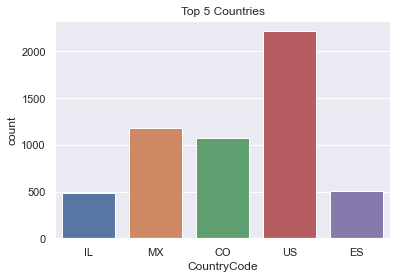

In [82]:
ax = sns.countplot(x='CountryCode', data= df[(df.CountryCode == 'US') | (df.CountryCode == 'MX') | (df.CountryCode == 'CO') | (df.CountryCode == 'ES') | (df.CountryCode == 'IL')]).set_title('Top 5 Countries')

Out of the top 10,000 most viewed presentations, about 1/5 of them were from the US

## Which themeID is most popular among the most viewed presentations?

In [29]:
df.groupby('themeID')['presentationID'].count().sort_values(ascending=False).head()

themeID
11054    1230
2022      391
1020      350
2024      323
1021      290
Name: presentationID, dtype: int64

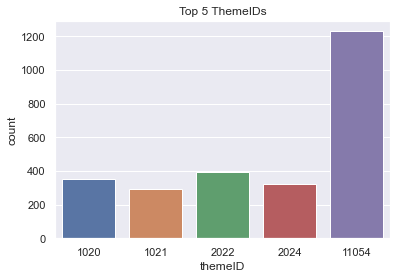

In [83]:
ax = sns.countplot(x='themeID', data= df[(df.themeID == 11054) | (df.themeID == 2022) | (df.themeID == 1020) | (df.themeID == 2024) | (df.themeID == 1021)]).set_title('Top 5 ThemeIDs')

Out of the top 10,000 most viewed presentations, 1128 of them belonged to themeID 11054

## How many of the most viewed presentations belong to premium users?

In [30]:
df['PremiumStartDate'].count()

1215

About 12% of the most viewed presentations belong(ed) to premium users

## Shares

In [31]:
df['total_shares'] = df['facebookShares'] + df['googlePlusShares'] + df['linkedinShares'] + df['twitterShares'] + df['pinterestShares']

In [32]:
df[df.total_shares != 0]['total_shares'].sort_values(ascending = False).head()

370     471
353     447
616     250
0       161
5100    124
Name: total_shares, dtype: int64

In [33]:
df[df.total_shares != 0]['total_shares'].sort_values(ascending = False).mean()

41.44871794871795

In [34]:
df[df.total_shares != 0]['total_shares'].sort_values(ascending = False).median()

21.0

***

***

***

#### This data represents the top 10,000 presentations with the most number of slides

In [35]:
df_slides = pd.read_csv('data/Presentations_slideCount.csv')

In [36]:
df_slides.head()

,presentationID,name,description,dateCreated,dateUpdated,themeID,userID,views,privacy,collaborationFlag,...,linkedinShares,twitterShares,pinterestShares,UserId,IpAddress,CountryCode,RegisterDate,LastLoginDate,PremiumStartDate,PremiumEndDate
0,7187963,MGEE KAREN,Considerar la evaluación como base para el mej...,2016-10-15 23:19:02.680,2016-10-16 10:17:29.870,11054,316d7252-485a-4f0d-8995-70be515b7bd1,41,3,0,...,0,0,0,316d7252-485a-4f0d-8995-70be515b7bd1,189.203.45.177,MX,2016-10-13 16:24:04.547,2016-10-16 18:07:26.503,NaN,NaN
1,1835532,44-OCJbqg0Kkm.pptx,NaN,2015-03-11 12:34:46.093,2015-03-11 12:34:46.093,8047,048710c8-4346-4008-8ff4-37451577e8bd,10,3,0,...,0,0,0,048710c8-4346-4008-8ff4-37451577e8bd,62.90.24.165,IL,2015-03-02 14:57:04.493,2017-01-19 15:09:45.117,NaN,NaN
2,16675744,Montagem e Instalação de Rede de Distribuição ...,Montagem e Instalação de Redes de Distribuição...,2020-03-24 00:07:25.923,2020-04-18 19:26:27.137,47314,859cad3d-a17c-4c02-9ca8-b0ac9c8c28c1,14,3,0,...,0,0,0,859cad3d-a17c-4c02-9ca8-b0ac9c8c28c1,177.221.59.32,BR,2020-01-15 20:25:10.753,2020-04-20 21:32:20.807,NaN,NaN
3,3163742,Other usages of Can (Hucy),PRICESExpensiveCheapWhich one is more expensiv...,2015-09-18 11:01:19.163,2020-05-18 21:44:16.953,13058,291f19fa-70e3-417a-94c1-cbb4fd437203,153,3,0,...,0,0,0,291f19fa-70e3-417a-94c1-cbb4fd437203,177.180.30.179,BR,2015-03-23 23:50:47.077,2020-06-24 23:45:37.987,NaN,NaN
4,8760245,GoddessDressInspiration,GoddessDress InspirationsDreamEmotionsMagicSha...,2017-03-08 00:49:22.803,2017-04-29 18:22:49.977,4024,80c9dfea-07c7-474c-9177-59bf732b5123,182,3,0,...,0,0,0,80c9dfea-07c7-474c-9177-59bf732b5123,68.103.152.141,US,2016-12-17 19:03:34.857,2017-04-29 17:59:55.877,NaN,NaN


In [37]:
df_slides.columns

Index(['presentationID', 'name', 'description', 'dateCreated', 'dateUpdated',
       'themeID', 'userID', 'views', 'privacy', 'collaborationFlag',
       'slideCount', 'language', 'facebookShares', 'googlePlusShares',
       'linkedinShares', 'twitterShares', 'pinterestShares', 'UserId',
       'IpAddress', 'CountryCode', 'RegisterDate', 'LastLoginDate',
       'PremiumStartDate', 'PremiumEndDate'],
      dtype='object')

## Which countries have presentations with the most slides?

In [38]:
df_slides.groupby('CountryCode')['presentationID'].count().sort_values(ascending=False).head()

CountryCode
US    1761
MX    1274
CO     762
BR     598
ES     490
Name: presentationID, dtype: int64

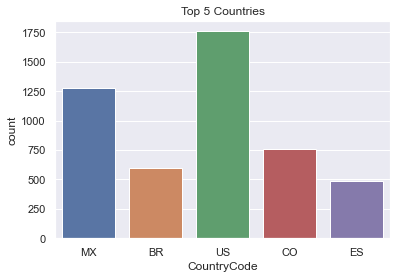

In [84]:
ax = sns.countplot(x='CountryCode', data= df_slides[(df_slides.CountryCode == 'US') | (df_slides.CountryCode == 'MX') | (df_slides.CountryCode == 'CO') | (df_slides.CountryCode == 'ES') | (df_slides.CountryCode == 'BR')]).set_title('Top 5 Countries')

## Which themeID is most popular among the presentations with most slides?

In [39]:
df_slides.groupby('themeID')['presentationID'].count().sort_values(ascending=False).head()

themeID
11054    625
11055    380
1021     310
46670    302
47565    256
Name: presentationID, dtype: int64

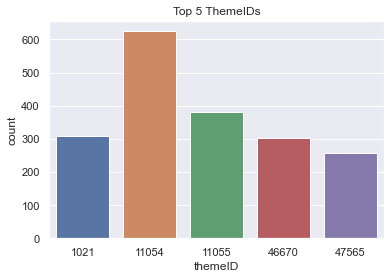

In [85]:
ax = sns.countplot(x='themeID', data= df_slides[(df_slides.themeID == 11054) | (df_slides.themeID == 11055) | (df_slides.themeID == 1021) | (df_slides.themeID == 46670) | (df_slides.themeID == 47565)]).set_title('Top 5 ThemeIDs')

## How many of the most viewed presentations belong to premium users?

In [40]:
df_slides['PremiumStartDate'].count()

2583

25% of the users with the most slides have at one point been premium

## Shares

In [41]:
df_slides['total_shares'] = df_slides['facebookShares'] + df_slides['googlePlusShares'] + df_slides['linkedinShares'] + df_slides['twitterShares'] + df_slides['pinterestShares']

In [42]:
df_slides[df_slides.total_shares != 0]['total_shares'].sort_values(ascending = False).head()

6877    4
6871    4
6945    2
Name: total_shares, dtype: int64

## Privacy

In [67]:
df_slides[df_slides.privacy != 3].shape

(1691, 25)

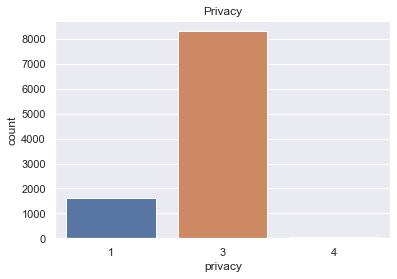

In [92]:
ax = sns.countplot(x='privacy', data= df_slides).set_title('Privacy')

17% of the top 10,000 presentations with the most slides are NOT public

## Collaborators

In [69]:
df_slides[df_slides.collaborationFlag == 1].shape

(115, 25)

***

# Takeaways

- Power users are from the US (most viewed presentations and most slides)
- ThemeID 11054 is a theme that brings success
- Users that make presentations with lots of slides are more likely to be Premium users than users with presentations with lots of views
- Lots of Views = More Shares, Lots of Slides != More Shares
- The collaboration feature is not very impactful as many are not using  it

***

***

### This dataset contains the top 10,000 users who have created the most amount of presentations

In [43]:
df_count = pd.read_csv('data/Presentations_count.csv')

In [63]:
df_count.head()

,userID,total_pre,total_views,total_slides,fb,gp,li,tw,pi,UserId,IpAddress,CountryCode,RegisterDate,LastLoginDate,PremiumStartDate,PremiumEndDate
0,87e2923a-fd01-43ac-8369-864081916f83,34661,658938,231,141,36,90,82,78,87e2923a-fd01-43ac-8369-864081916f83,37.142.18.22,IL,2017-09-14 14:15:32.497,2020-06-15 09:40:48.607,2017-08-14 09:09:02.503,2022-04-14 06:47:36.370
1,3e41b10d-373c-4af3-a599-6c6fc5ef4906,4648,132062,19147,0,0,0,0,0,3e41b10d-373c-4af3-a599-6c6fc5ef4906,189.211.179.148,MX,2015-10-19 18:04:01.607,2016-05-28 22:01:30.747,2015-10-19 19:58:29.410,2016-10-19 19:58:29.410
2,5ebd12fc-508b-4eaa-98b5-9d1c07eea382,4123,12033,17528,0,0,0,0,0,5ebd12fc-508b-4eaa-98b5-9d1c07eea382,201.144.206.244,MX,2015-12-04 22:42:50.063,2016-11-08 23:30:46.487,2015-12-05 09:57:44.613,2016-12-05 09:57:44.613
3,15010f03-4796-4bc0-9939-6189f347e1a6,3751,55,7384,0,0,0,0,0,15010f03-4796-4bc0-9939-6189f347e1a6,182.191.117.32,PK,2016-11-03 06:09:11.227,2016-12-05 10:52:11.123,NaN,NaN
4,3389ccd5-353d-429a-9006-122416dfff77,3647,895,7207,0,0,0,0,0,3389ccd5-353d-429a-9006-122416dfff77,39.53.116.74,PK,2016-08-01 06:38:31.147,2016-10-27 08:30:03.753,NaN,NaN


## Country

In [45]:
df_count.groupby('CountryCode')['userID'].count().sort_values(ascending=False).head()

CountryCode
US    6704
MX     553
IL     291
CO     287
BR     152
Name: userID, dtype: int64

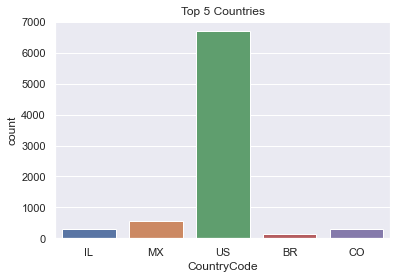

In [94]:
ax = sns.countplot(x='CountryCode', data= df_count[(df_count.CountryCode == 'US') | (df_count.CountryCode == 'MX') | (df_count.CountryCode == 'IL') | (df_count.CountryCode == 'CO') | (df_count.CountryCode == 'BR')]).set_title('Top 5 Countries')

## Premium?

In [46]:
df_count['PremiumStartDate'].count()

1820

18% of the top 10,000 users with the most presentations are premium users

***

### This dataset contains the top 10,000 users with the most views on their presentations

In [48]:
views = pd.read_csv('data/Presentations_count_byviews.csv')

In [49]:
views.head()

,userID,total_pre,total_views,total_slides,fb,gp,li,tw,pi,UserId,IpAddress,CountryCode,RegisterDate,LastLoginDate,PremiumStartDate,PremiumEndDate
0,18d5fe79-926b-489c-9dc3-406641760d0d,600,14365878,4405.0,87,71,16,16,28,18d5fe79-926b-489c-9dc3-406641760d0d,80.178.195.170,IL,2015-09-20 14:35:04.737,2020-06-25 13:44:10.123,2019-06-17 06:53:28.407,2021-06-23 12:25:58.153
1,fe58bbba-c36c-411e-bd55-7cc05b9c0c5c,6,3397363,33.0,0,0,0,0,0,fe58bbba-c36c-411e-bd55-7cc05b9c0c5c,148.229.15.97,MX,2017-03-29 16:21:08.100,2019-08-12 16:54:15.490,NaN,NaN
2,9861779c-bca6-4661-ab40-7f5202b5b916,142,1144949,1047.0,26,8,3,5,3,9861779c-bca6-4661-ab40-7f5202b5b916,148.229.43.21,MX,2018-06-08 16:32:15.047,2020-06-19 14:47:55.880,2018-09-03 17:09:25.913,2020-09-03 18:01:23.640
3,e2ee2dc3-a514-41da-a7f5-ea00e6f129fe,14,920226,114.0,0,0,0,0,0,e2ee2dc3-a514-41da-a7f5-ea00e6f129fe,212.219.14.254,GB,2014-01-27 10:57:46.863,2015-11-09 11:02:32.787,NaN,NaN
4,279f6e96-9cd7-4f31-a07f-831e4c29b3ba,293,911271,2823.0,2,0,1,0,2,279f6e96-9cd7-4f31-a07f-831e4c29b3ba,189.203.12.178,MX,2016-04-01 00:48:59.847,2020-03-19 21:04:49.037,2018-07-19 14:46:15.207,2020-07-19 15:00:32.550


## Country

In [52]:
views.groupby('CountryCode')['userID'].count().sort_values(ascending=False).head()

CountryCode
US    2113
MX    1411
CO    1196
ES     513
GB     356
Name: userID, dtype: int64

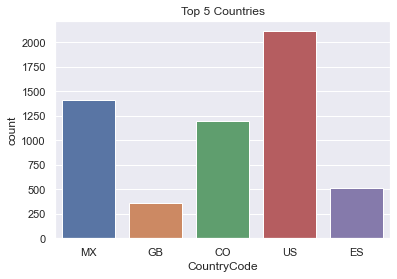

In [95]:
ax = sns.countplot(x='CountryCode', data= views[(views.CountryCode == 'US') | (views.CountryCode == 'MX') | (views.CountryCode == 'CO') | (views.CountryCode == 'ES') | (views.CountryCode == 'GB')]).set_title('Top 5 Countries')

## Premium?

In [64]:
views['PremiumStartDate'].count()

1035

10% of the top 10,000 users with the most views are premium users

***

### This dataset contains the top 10,000 users with the most total slides on their presentations

In [50]:
slides = pd.read_csv('data/Presentations_count_byslides.csv')

In [51]:
slides.head()

,userID,total_pre,total_views,total_slides,fb,gp,li,tw,pi,UserId,IpAddress,CountryCode,RegisterDate,LastLoginDate,PremiumStartDate,PremiumEndDate
0,cc9cc585-2149-4675-903e-aa5182235b8c,1113,8545,25156,0,0,0,0,0,cc9cc585-2149-4675-903e-aa5182235b8c,187.178.191.185,MX,2014-12-26 16:55:41.853,2018-02-01 03:08:51.673,2016-01-18 16:17:17.820,2018-01-21 16:17:17.820
1,3a07b126-d0f0-4c52-8422-bee0be413aa1,1244,18175,20763,0,0,0,0,0,3a07b126-d0f0-4c52-8422-bee0be413aa1,76.98.16.182,US,2015-04-13 12:30:21.567,2018-08-20 15:02:36.977,2018-06-04 04:36:42.837,2019-06-04 04:36:42.837
2,bb296418-ed91-483c-98d7-3337ba7271f1,397,7085,20683,0,0,0,0,0,bb296418-ed91-483c-98d7-3337ba7271f1,187.140.221.62,MX,2015-04-04 21:24:48.420,2020-05-16 04:49:13.887,2018-07-14 00:11:08.750,2020-07-14 01:00:18.750
3,371088ec-ccd9-4c1e-acb3-6c3b43c84627,1641,25760,19196,3,0,0,1,0,371088ec-ccd9-4c1e-acb3-6c3b43c84627,80.178.195.170,IL,2017-11-15 10:32:38.790,2020-06-18 06:25:49.287,2019-06-17 06:53:28.407,2021-06-23 12:25:58.153
4,3e41b10d-373c-4af3-a599-6c6fc5ef4906,4648,132061,19147,0,0,0,0,0,3e41b10d-373c-4af3-a599-6c6fc5ef4906,189.211.179.148,MX,2015-10-19 18:04:01.607,2016-05-28 22:01:30.747,2015-10-19 19:58:29.410,2016-10-19 19:58:29.410


## Count

In [54]:
slides.groupby('CountryCode')['userID'].count().sort_values(ascending=False).head()

CountryCode
US    5340
MX     819
CO     456
IL     337
BR     277
Name: userID, dtype: int64

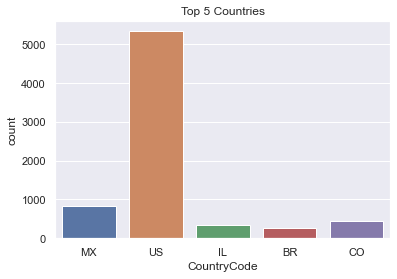

In [96]:
ax = sns.countplot(x='CountryCode', data= slides[(slides.CountryCode == 'US') | (slides.CountryCode == 'MX') | (slides.CountryCode == 'CO') | (slides.CountryCode == 'IL') | (slides.CountryCode == 'BR')]).set_title('Top 5 Countries')

## Premium?

In [65]:
slides['PremiumStartDate'].count()

2604

26% of the top 10,000 users with most slides are premium users